In [4]:
'''
Projeto - Conjunto de dados para vendas de videgames
dados de vendas e classificações de jogos de video game extraídos do VZCharts
Vendas de jogos de PS4
'''

'\nProjeto - Conjunto de dados para vendas de videgames\ndados de vendas e classificações de jogos de video game extraídos do VZCharts\nVendas de jogos de PS4\n'

In [5]:
#libs Necessarias

#libs para Modelagem e Matrizes
import pandas  as pd
import numpy as np

#libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

#lib para ignorar avisos
import warnings

warnings.filterwarnings('ignore')


In [6]:
#lendo os dados
base_dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

#verificando
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [7]:
# Dimensão
base_dados.shape

(1034, 9)

In [8]:
#nulos
base_dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

'\nVerificamos que o que esta nulo no Year esta nulo no Publisher\n'

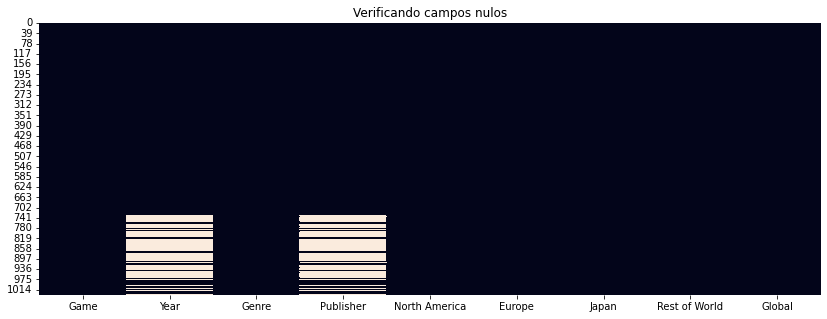

In [9]:
#nulos graficos
plt.figure(figsize=(14,5))
plt.title('Verificando campos nulos')
sns.heatmap(base_dados.isnull(), cbar=False);

'''
Verificamos que o que esta nulo no Year esta nulo no Publisher
'''

In [10]:
#Retirar valores nulos e aplicando na base de dados
base_dados.dropna( inplace = True)

In [11]:
#Estatisticas
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


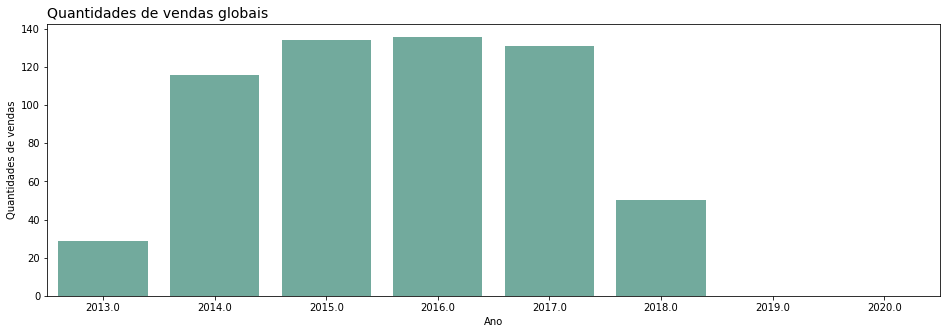

In [12]:
#Analise grafica anual de vendas de games PS4
plt.figure(figsize=(16,5)) #tamanho da imagem
plt.title('Quantidades de vendas globais', loc = 'left', fontsize = 14)#titulo
#grafico ci = retira a linha do  grafico ,estimator coloca valor inteiro sum = soma
sns.barplot(data=base_dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum);
plt.ylabel('Quantidades de vendas') #titulo y
plt.xlabel('Ano'); #titulo x

In [13]:
#Retirar os anos nulos
base_dados = base_dados.loc[(base_dados['Year'] != 2019) & (base_dados['Year'] != 2020)] # --> ['Year].unique() para confirmar se excluiu

base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


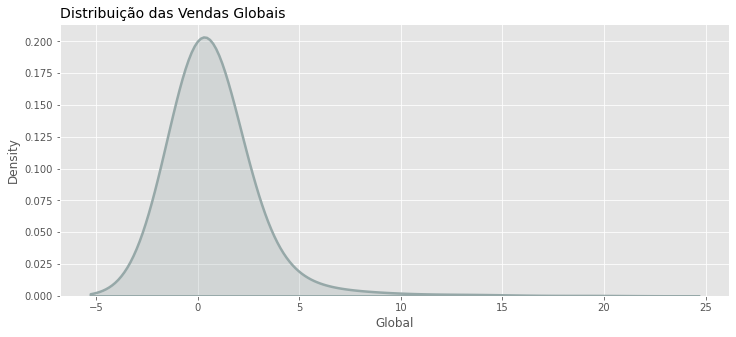

In [14]:
# Plotagem para verificar a distribuição do valor GLOBAL da base de dados
plt.figure(figsize=(12,5))
plt.style.use('ggplot') #estilo

plt.title('Distribuição das Vendas Globais', loc='left', fontsize=14)

sns.kdeplot(base_dados['Global'], shade=True, bw=1, color = '#96a8a8', linewidth=2.5) #grafico de densidade
#shade = cor de preencimento dentro da linha, BW estica a linha do grafico , linewidht largura da linha


In [15]:
#agrupando por ano
analise = base_dados.groupby(by=['Year']).sum()
analise

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


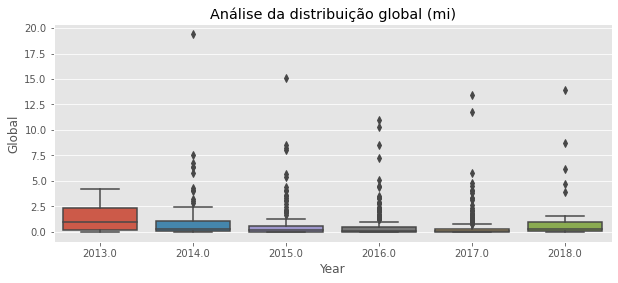

In [16]:
#boxplot anual
plt.figure(figsize=(10,4))
plt.title('Análise da distribuição global (mi)')
sns.boxplot(data=base_dados, x='Year', y='Global')


In [17]:
#localizando games que venderam mais de 10 mil
base_dados.loc[base_dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [18]:
#analisando a proporção dos 100% de cada continente comparando ao total
America = [ America / Total * 100 for America, Total in zip(analise['North America'], analise['Global'])]
Europa = [ Europa / Total * 100 for Europa, Total in zip(analise['Europe'], analise['Global'])]
Japao = [ Japao / Total * 100 for Japao, Total in zip(analise['Japan'], analise['Global'])]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip(analise['Rest of World'], analise['Global'])]

In [19]:
analise

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


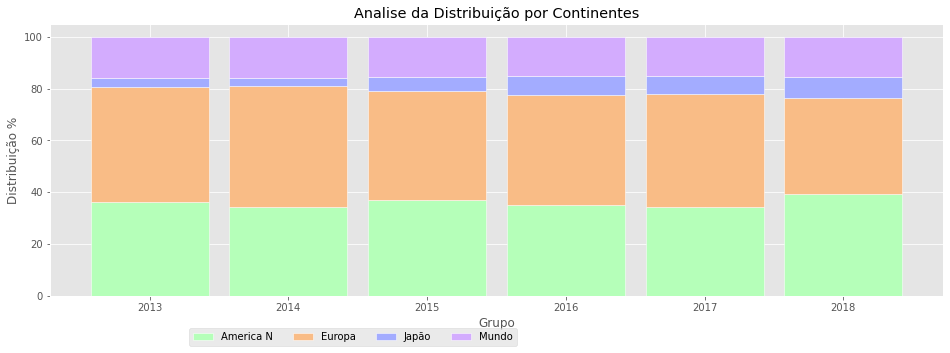

In [20]:
#Grafico de barra empilhada
plt.figure(figsize=(16,5))

largura_barra = 0.85
Rotulos = analise = ['2013', '2014', '2015', '2016', '2017', '2018']
grupos = [0, 1, 2, 3, 4, 5]

plt.title('Analise da Distribuição por Continentes')

plt.bar(grupos, America, width = largura_barra, color='#b5ffb9', edgecolor='white') #Plot da America
plt.bar(grupos, Europa, bottom=America,  width = largura_barra, color='#f9bc86', edgecolor='white') #Plot da Europa
plt.bar(grupos, Japao, bottom =[A+B for A,B in zip(America, Europa)],  width = largura_barra, color='#a3acff', edgecolor='white') #Plot do Japão
plt.bar(grupos, Mundo, bottom =[A+B+C for A,B,C in zip(America, Europa, Japao)],  width = largura_barra, color='#d3acfe', edgecolor='white') #Plot do Resto do mundo

#labels
plt.xticks(grupos, Rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

#legenda
plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15,-0.1), ncol=4)
#nome das legendas, local da legenda,bbox_to_anchor onde vai ficar a legenda  , ncol n de colunas


In [23]:
base_dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [29]:
'''
Convertendo "publisher , genre e game" de valo qualitativo para qualitativo
'''
from sklearn.preprocessing import LabelEncoder
#transforma valores de texto em valores numericos em uma sequencia
funcao_label = LabelEncoder()
base_dados['Produtor'] = funcao_label.fit_transform(base_dados['Publisher']) #cria a coluna produtor e dar um número para ela
base_dados['Genero'] = funcao_label.fit_transform(base_dados['Genre']) #cria a coluna genero e dar um número para ela
base_dados['Jogo'] = funcao_label.fit_transform(base_dados['Game']) #cria a coluna Jogo e dar um número para ela
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [34]:
paleta_cores = sns.color_palette('husl', 8)
paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

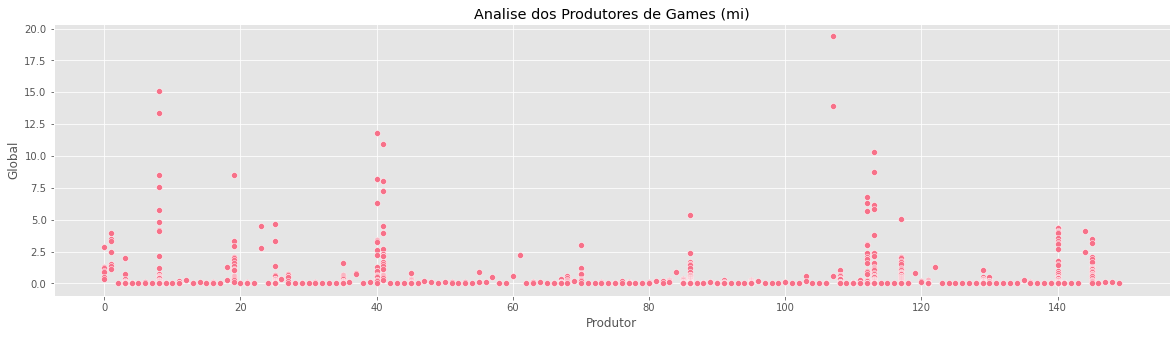

In [41]:
plt.figure(figsize=(20,5))
plt.title('Analise dos Produtores de Games (mi)')
sns.scatterplot(data=base_dados, x='Produtor', y='Global', color=paleta_cores[0]);

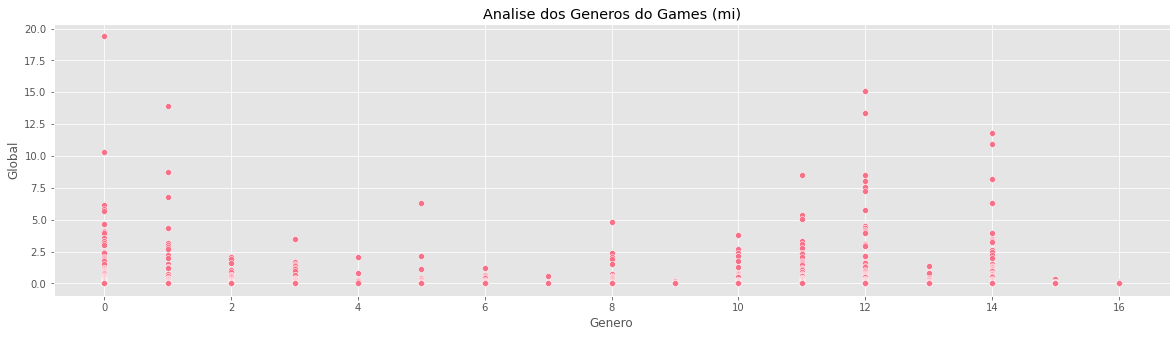

In [43]:
plt.figure(figsize=(20,5))
plt.title('Analise dos Generos do Games (mi)')
sns.scatterplot(data=base_dados, x='Genero', y='Global', color=paleta_cores[0]);

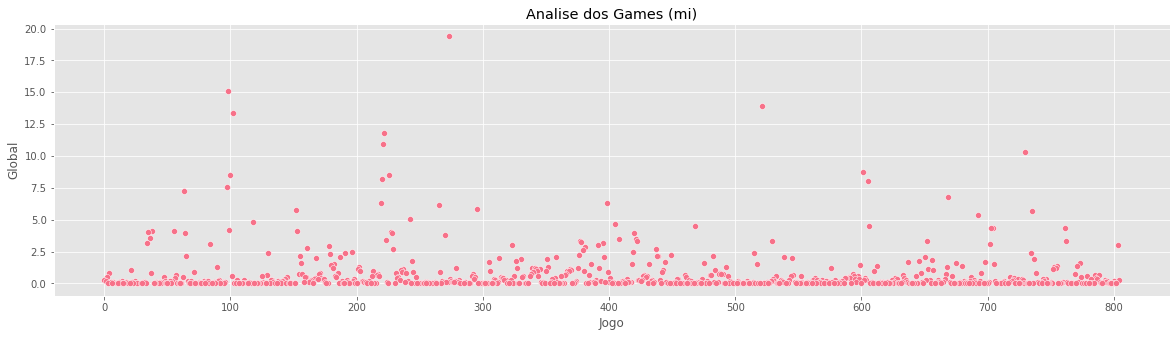

In [44]:
plt.figure(figsize=(20,5))
plt.title('Analise dos Games (mi)')
sns.scatterplot(data=base_dados, x='Jogo', y='Global', color=paleta_cores[0]);